_______________________________________________________________________

In [36]:
import numpy as np
from scipy.integrate import odeint

# Параметры системы
l1, l2 = 1.0, 1.0
m1, m2 = 1.0, 1.0
g = 9.8
Kv = 100 * np.eye(2)
F = 10 * np.eye(10)
A1, A2 = 0.25, 0.25
omega = 1.0
theta1, theta2 = 0.0, 0.0
Lambda = np.diag([0.2, 0.2])
kappa = 10
Kz = 1.0  # Добавьте значение Kz, если оно не указано
P = np.eye(2)  # Добавьте значение P, если оно не указано
R = np.eye(2)  # Добавьте значение R, если оно не указано
ZB = np.array([1.0, 1.0])  # Добавьте значение ZB, если оно не указано

def M(q):
    return np.array([
        [(m1 + m2) * l1**2 + m2 * l2**2 + 2 * m2 * l1 * l2 * np.cos(q[1]),
         m2 * l2**2 + m2 * l1 * l2 * np.cos(q[1])],
        [m2 * l2**2 + m2 * l1 * l2 * np.cos(q[1]),
         m2 * l2**2]
    ])

def Vm(q, dq):
    return np.array([
        [-dq[1] * m2 * l1 * l2 * np.sin(q[1]),
         -(dq[0] + dq[1]) * m2 * l1 * l2 * np.sin(q[1])],
        [dq[0] * m2 * l1 * l2 * np.sin(q[1]),
         0]
    ])

# Целевые значения для углов
q1_target = lambda t: np.pi / 2
q2_target = lambda t: A2 * np.sin(omega * t + theta2)

def phi(x):
    return np.tanh(x)

def f(x):
    return np.array([np.sin(x[0]), np.cos(x[1])])

def v(t, r, Z, ZB):
    return -Kz * (np.linalg.norm(Z) + np.dot(ZB, r))

def equations(t, y):
    q_dot = y[:2]
    q = y[2:4]
    W = y[4:24].reshape(-1, 2)
    V = y[24:].reshape(-1, 2)
    
    q1_dot = 0
    q2_dot = A2 * omega * np.cos(omega * t + theta2)
    
    q1_dot_dot = 0
    q2_dot_dot = -A2 * (omega**2) * np.sin(omega * t + theta2)
    
    qd = np.array([q1_target(t), q2_target(t)])
    qd_dot = np.array([q1_dot, q2_dot])
    qd_dot_dot = np.array([q1_dot_dot, q2_dot_dot])
    
    # Ошибки
    e = q - qd
    e_dot = q_dot - qd_dot
    
    x = np.concatenate((e, e_dot, qd, qd_dot, qd_dot_dot))
    
    phi_x = phi(x)
    f_x = f(x)
    
    r = e_dot + Lambda @ e
    
    # Управляющий сигнал
    tau = W.T @ phi_x + Kv @ r
    tau_d = np.random.normal(0, 1, tau.size)
    v_t = v(t, r, V, ZB)
    r_dot = np.linalg.solve(M(q), -Vm(q, q_dot) @ r + f_x - tau + tau_d + v_t)
    
    W_dot = F @ np.outer(phi_x, r) - kappa * np.linalg.norm(r) * F @ W
    V_dot = R * np.linalg.norm(r) * np.linalg.norm(V) - kappa * R * np.linalg.norm(r) * V.T
    
    return np.concatenate((r_dot, q_dot, W_dot.ravel(), V_dot.ravel()))

# Начальные условия
q0 = np.zeros(2)
q_dot0 = np.zeros(2)
W0 = np.zeros((10, 2))
V0 = np.zeros((2, 2))
init = np.concatenate((q_dot0, q0, W0.ravel(), V0.ravel()))
t_span = [0, 50]
t_eval = np.linspace(0, 50, 100)

# Решение системы дифференциальных уравнений
sol = solve_ivp(equations, t_span, init, t_eval=t_eval, method='RK23')

q1_sol = sol.y[2, :]
q2_sol = sol.y[3, :]

# Вычисление ошибок для q1 и q2
error_q1 = q1_target(t_eval) - q1_sol
error_q2 = q2_target(t_eval) - q2_sol

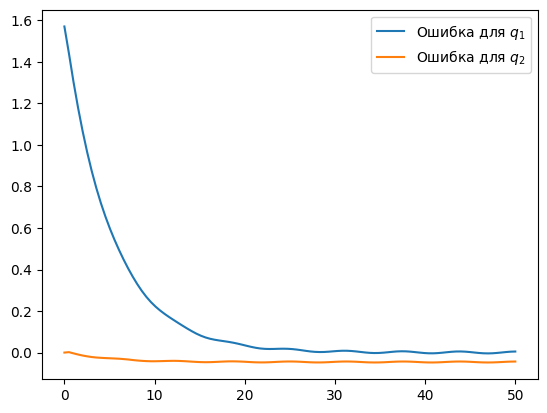

In [37]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(t_eval, error_q1, label='Ошибка для $q_1$')
ax.plot(t_eval, error_q2, label='Ошибка для $q_2$')
ax.legend(loc='best')
plt.show()

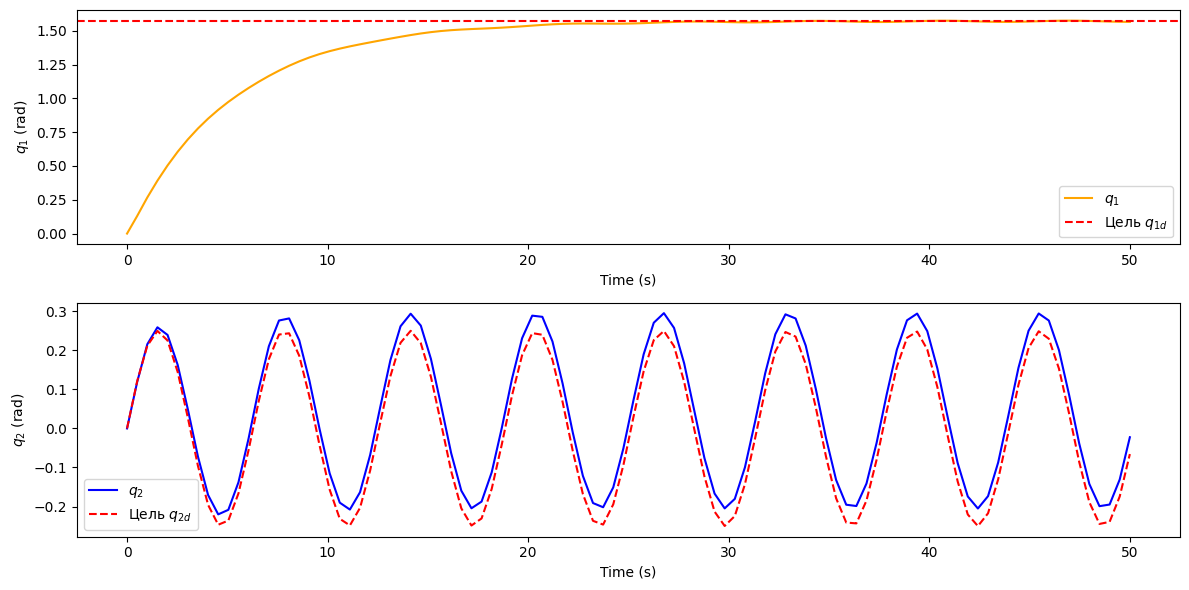

In [41]:
# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_eval, q1_sol, label='$q_1$', color='orange')
plt.axhline(y=np.pi/2, color='r', linestyle='--', label='Цель $q_{1d}$')
plt.xlabel('Time (s)')
plt.ylabel('$q_1$ (rad)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_eval, q2_sol, label='$q_2$', color='blue')
plt.plot(t_eval, A2 * np.sin(omega*t_eval + theta2), label='Цель $q_{2d}$', linestyle='--', color='red')
plt.xlabel('Time (s)')
plt.ylabel('$q_2$ (rad)')
plt.legend()

plt.tight_layout()
plt.show()

___________________________________________________________________________________________________________

task 12 

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Параметры системы
l1, l2 = 1.0, 1.0
m1, m2 = 1.0, 1.0
g = 9.8
Kv = 100 * np.eye(2)
F = 10 * np.eye(10)
A1, A2 = 0.25, 0.25
omega = 1.0
theta1, theta2 = 0.0, 0.0
Lambda = np.diag([0.2, 0.2])
kappa = 10
Kz = 1.0  # Добавьте значение Kz, если оно не указано
P = np.eye(2)  # Добавьте значение P, если оно не указано
R = np.eye(2)  # Добавьте значение R, если оно не указано
ZB = np.array([1.0, 1.0])  # Добавьте значение ZB, если оно не указано

def M(q):
    return np.array([
        [(m1 + m2) * l1**2 + m2 * l2**2 + 2 * m2 * l1 * l2 * np.cos(q[1]),
         m2 * l2**2 + m2 * l1 * l2 * np.cos(q[1])],
        [m2 * l2**2 + m2 * l1 * l2 * np.cos(q[1]),
         m2 * l2**2]
    ])

def Vm(q, dq):
    return np.array([
        [-dq[1] * m2 * l1 * l2 * np.sin(q[1]),
         -(dq[0] + dq[1]) * m2 * l1 * l2 * np.sin(q[1])],
        [dq[0] * m2 * l1 * l2 * np.sin(q[1]),
         0]
    ])

# Целевые значения для углов
q1_target = lambda t: np.pi / 2
q2_target = lambda t: A2 * np.sin(omega * t + theta2)

def phi(x):
    return np.tanh(x)

def f(x, q, dq, ddq, de):
    return M(q) @ (ddq + de) + np.array([np.sin(x[0]), np.cos(x[1])])

def v(t, r, Z, ZB):
    return -Kz * (np.linalg.norm(Z) + np.dot(ZB, r))

def equations(t, y):
    q_dot = y[:2]
    q = y[2:4]
    W = y[4:24].reshape(-1, 2)
    V = y[24:].reshape(-1, 2)
    
    q1_dot = 0
    q2_dot = A2 * omega * np.cos(omega * t + theta2)
    
    q1_dot_dot = 0
    q2_dot_dot = -A2 * (omega**2) * np.sin(omega * t + theta2)
    
    qd = np.array([q1_target(t), q2_target(t)])
    qd_dot = np.array([q1_dot, q2_dot])
    qd_dot_dot = np.array([q1_dot_dot, q2_dot_dot])
    
    # Ошибки
    e = q - qd
    e_dot = q_dot - qd_dot
    
    x = np.concatenate((e, e_dot, qd, qd_dot, qd_dot_dot))
    
    phi_x = phi(x)
    f_x = f(x, qd, qd_dot, qd_dot_dot, e_dot)
    
    r = e_dot + Lambda @ e
    
    # Управляющий сигнал
    tau = W.T @ phi_x + Kv @ r
    tau_d = np.random.normal(0, 1, tau.size)
    v_t = v(t, r, V, ZB)
    r_dot = np.linalg.solve(M(q), -Vm(q, q_dot) @ r + f_x - tau + tau_d + v_t)
    
    W_dot = F @ np.outer(phi_x, r) - kappa * np.linalg.norm(r) * F @ W
    V_dot = R * np.linalg.norm(r) * np.linalg.norm(V) - kappa * R * np.linalg.norm(r) * V.T
    
    return np.concatenate((r_dot, q_dot, W_dot.ravel(), V_dot.ravel()))

# Начальные условия
q0 = np.zeros(2)
q_dot0 = np.zeros(2)
W0 = np.zeros((10, 2))
V0 = np.zeros((2, 2))
init = np.concatenate((q_dot0, q0, W0.ravel(), V0.ravel()))
t_span = [0, 50]
t_eval = np.linspace(0, 50, 100)

# Решение системы дифференциальных уравнений
sol = solve_ivp(equations, t_span, init, t_eval=t_eval, method='RK23')

q1_sol = sol.y[2, :]
q2_sol = sol.y[3, :]

# Вычисление ошибок для q1 и q2
error_q1 = q1_target(t_eval) - q1_sol
error_q2 = q2_target(t_eval) - q2_sol

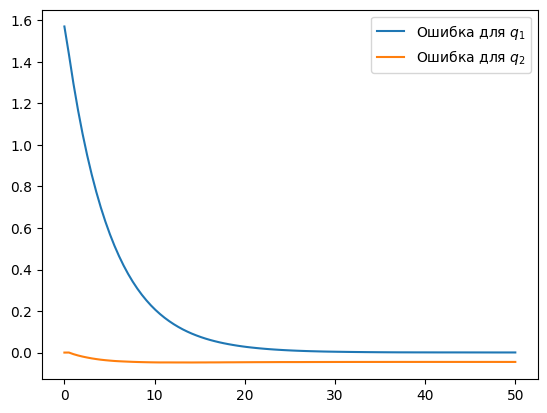

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(t_eval, error_q1, label='Ошибка для $q_1$')
ax.plot(t_eval, error_q2, label='Ошибка для $q_2$')
ax.legend(loc='best')
plt.show()

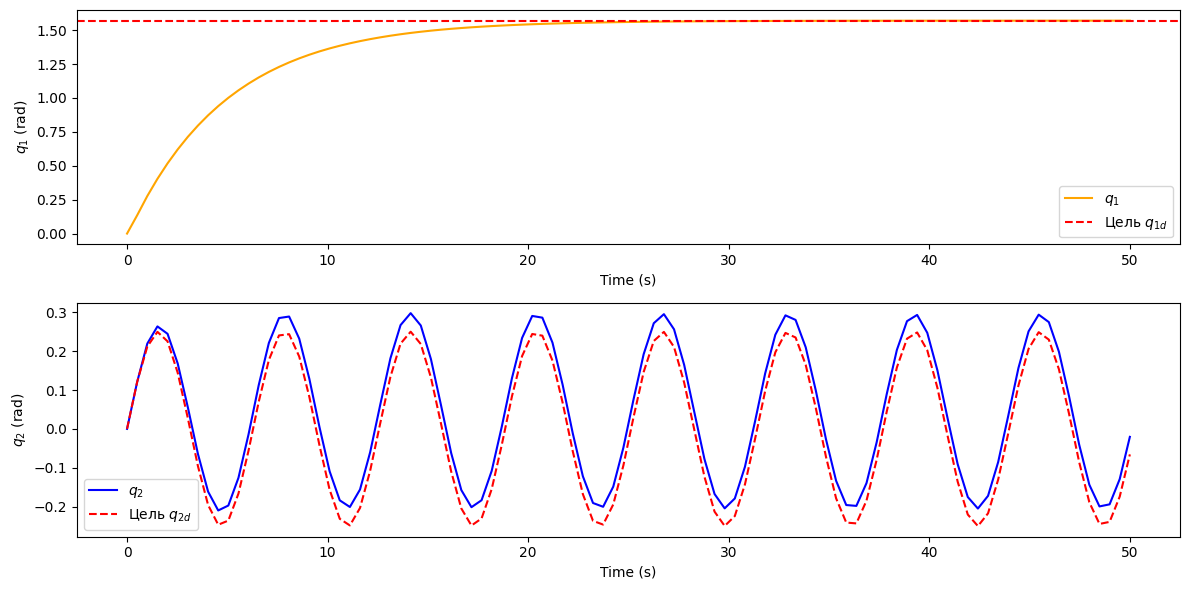

In [6]:
# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_eval, q1_sol, label='$q_1$', color='orange')
plt.axhline(y=np.pi/2, color='r', linestyle='--', label='Цель $q_{1d}$')
plt.xlabel('Time (s)')
plt.ylabel('$q_1$ (rad)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_eval, q2_sol, label='$q_2$', color='blue')
plt.plot(t_eval, A2 * np.sin(omega*t_eval + theta2), label='Цель $q_{2d}$', linestyle='--', color='red')
plt.xlabel('Time (s)')
plt.ylabel('$q_2$ (rad)')
plt.legend()

plt.tight_layout()
plt.show()